In [8]:
datadir ='/Users/krithigamurugavel/Downloads/gem5/Gem5_Plots/results'

In [9]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [10]:
import matplotlib

In [11]:
Configurations = ['run_config1','run_confgi2','run_config3']

all_arch = ['X86','ARM','RISCV']
zm_arch = ['X86']

all_memory_models = ['Slow', 'SingleCycle', 'Inf', 'Slow']
zm_memory_models = ['Slow']

all_benchmarks_names = ['CCa','CCe','CCm','CCh','CCh_st','CRd','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','ML2','ML2_BW_ld',
                    'MM']
all_gem5_cpus = ['Simple','DefaultO3','Minor']
zm_gem5_cpus = ['DefaultO3','Simple']

all_benchmarks =['X86/run_micro/Slow/'+ bm for bm in all_benchmarks_names]



In [12]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        print(r[start:end])
        return float(r[start:end])

In [13]:
#config1

rows = []
for bm in all_benchmarks:   
        for sys in zm_gem5_cpus:
            rows.append([bm, sys,
                             gem5GetStat(bm+'/'+sys, 'sim_ticks')/333, #1000
                             gem5GetStat(bm+'/'+sys, 'sim_insts'),
                             gem5GetStat(bm+'/'+sys, 'sim_ops'),
                             gem5GetStat(bm+'/'+sys, 'sim_ticks')/1e9,
                             gem5GetStat(bm+'/'+sys, 'host_op_rate'),
                            ])
            
vrg_df = pd.DataFrame(rows, columns=['benchmark','cpu',
                                      'cycles', 'instructions', 'ops','time','host_op_rate',
                                      ])
                        
vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']




                                   26030943                       
                                      47274                       
                                        86567                       
                                   26030943                       
                                  350580                       
                                   48254031                       
                                      47275                       
                                        86568                       
                                   48254031                       
                                 1123464                       
                                   26172801                       
                                      59533                       
                                       123435                       
                                   26172801                       
                                  374588                      

                                   38859768                       
                                      30926                       
                                        64047                       
                                   38859768                       
                                  124850                       
                                  189471006                       
                                      30927                       
                                        64048                       
                                  189471006                       
                                  459862                       
                                   34165800                       
                                      30926                       
                                        64047                       
                                   34165800                       
                                  139231                      

In [14]:
#plotting all Benchmark
def doplot_benchmarks(benchmarks,benchmark_names,stat,norm=True):
    plt.figure()
    i = 0
    for bm in benchmarks:
        base = vrg_df[(vrg_df['benchmark']==bm)][stat].iloc[0] if norm else 1
        for j,sys in enumerate(zm_gem5_cpus):
            d = vrg_df[(vrg_df['cpu']==sys) & (vrg_df['benchmark']==bm)]
            plt.bar(i, d[stat].iloc[0]/base, color='C'+str(j))
            i += 1
        i += 1
    for i,sys in enumerate(zm_gem5_cpus):
        plt.bar(0,0,color='C'+str(i), label=sys)
    new_names = benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names))*(len(zm_gem5_cpus)+1)+i/2, benchmark_names, rotation=40, ha='right')

<IPython.core.display.Javascript object>


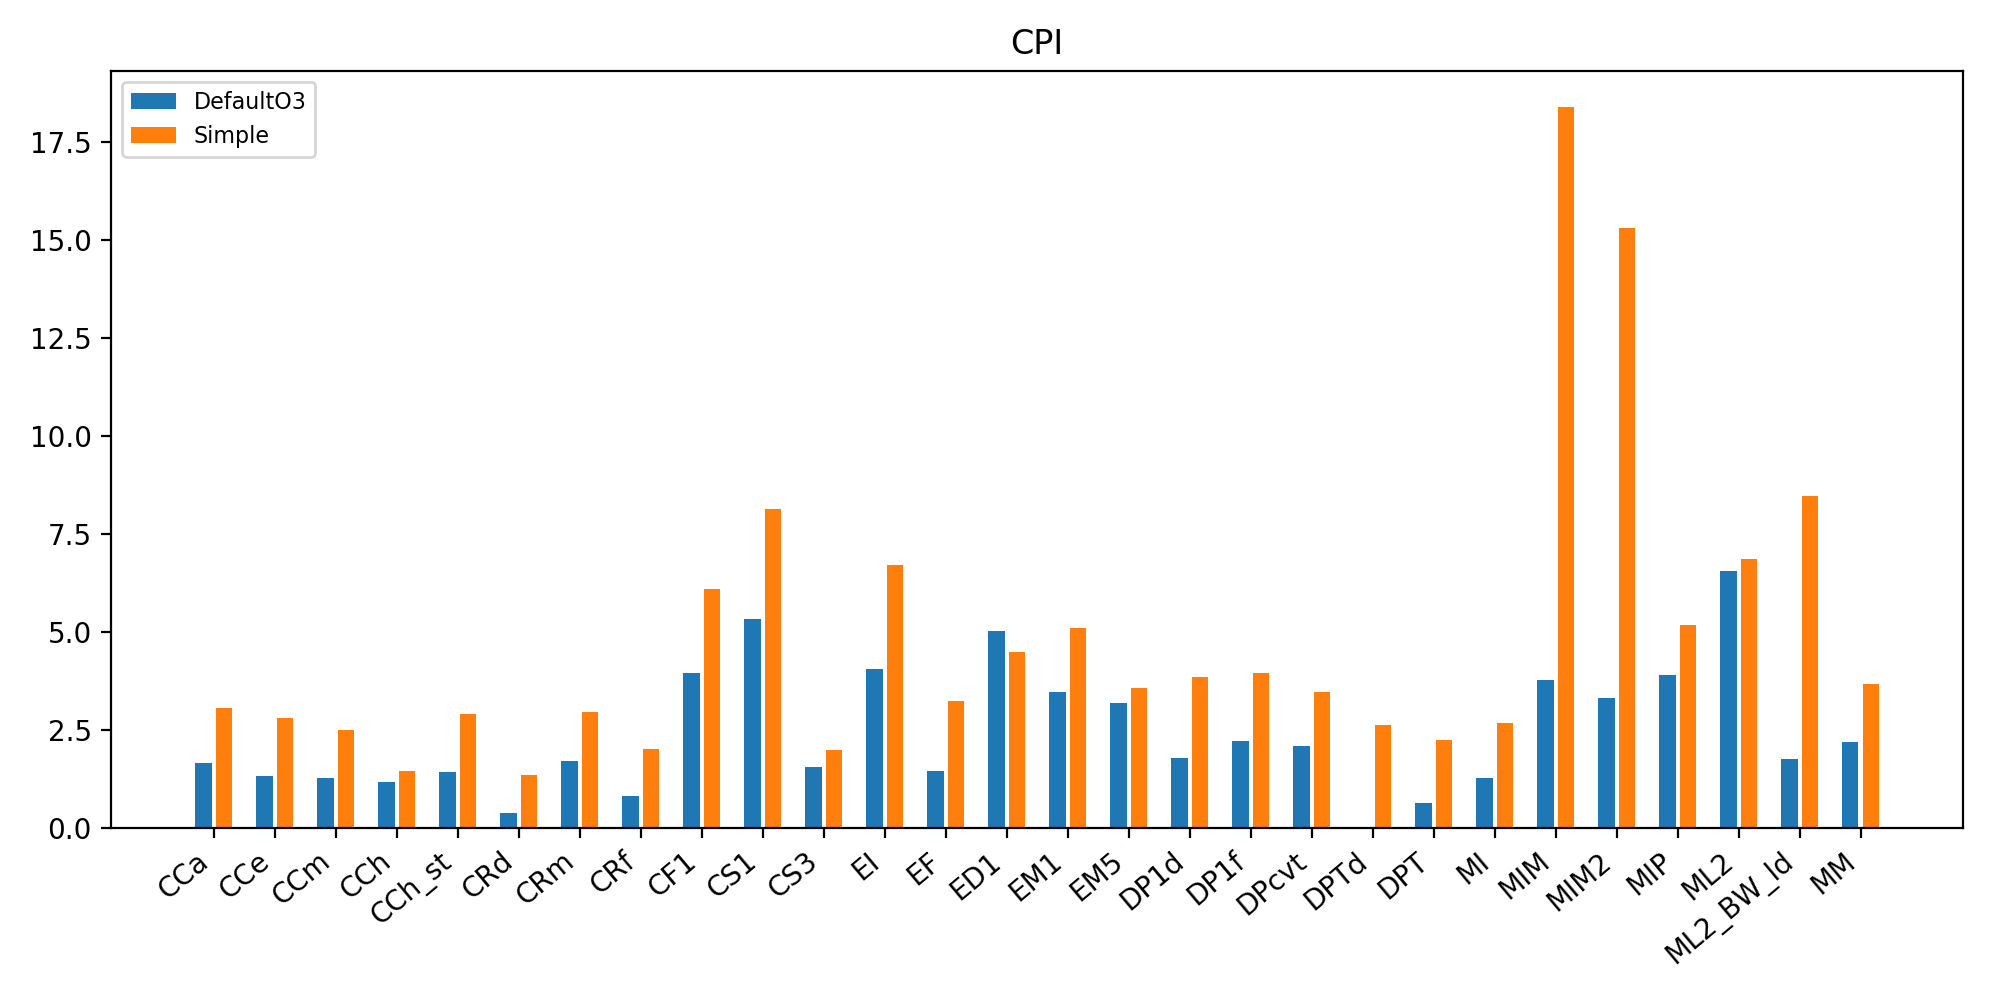

In [19]:
#plotting CPI
benchmarks = all_benchmarks
benchmark_names =  all_benchmarks_names
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'cpi',norm=False)
plt.ylabel('')
plt.legend(loc=2, prop={'size': 8})
plt.title('CPI')
plt.tight_layout()
plt.savefig('CPI_allbenchmarks.png', format='png', dpi=600)

<IPython.core.display.Javascript object>


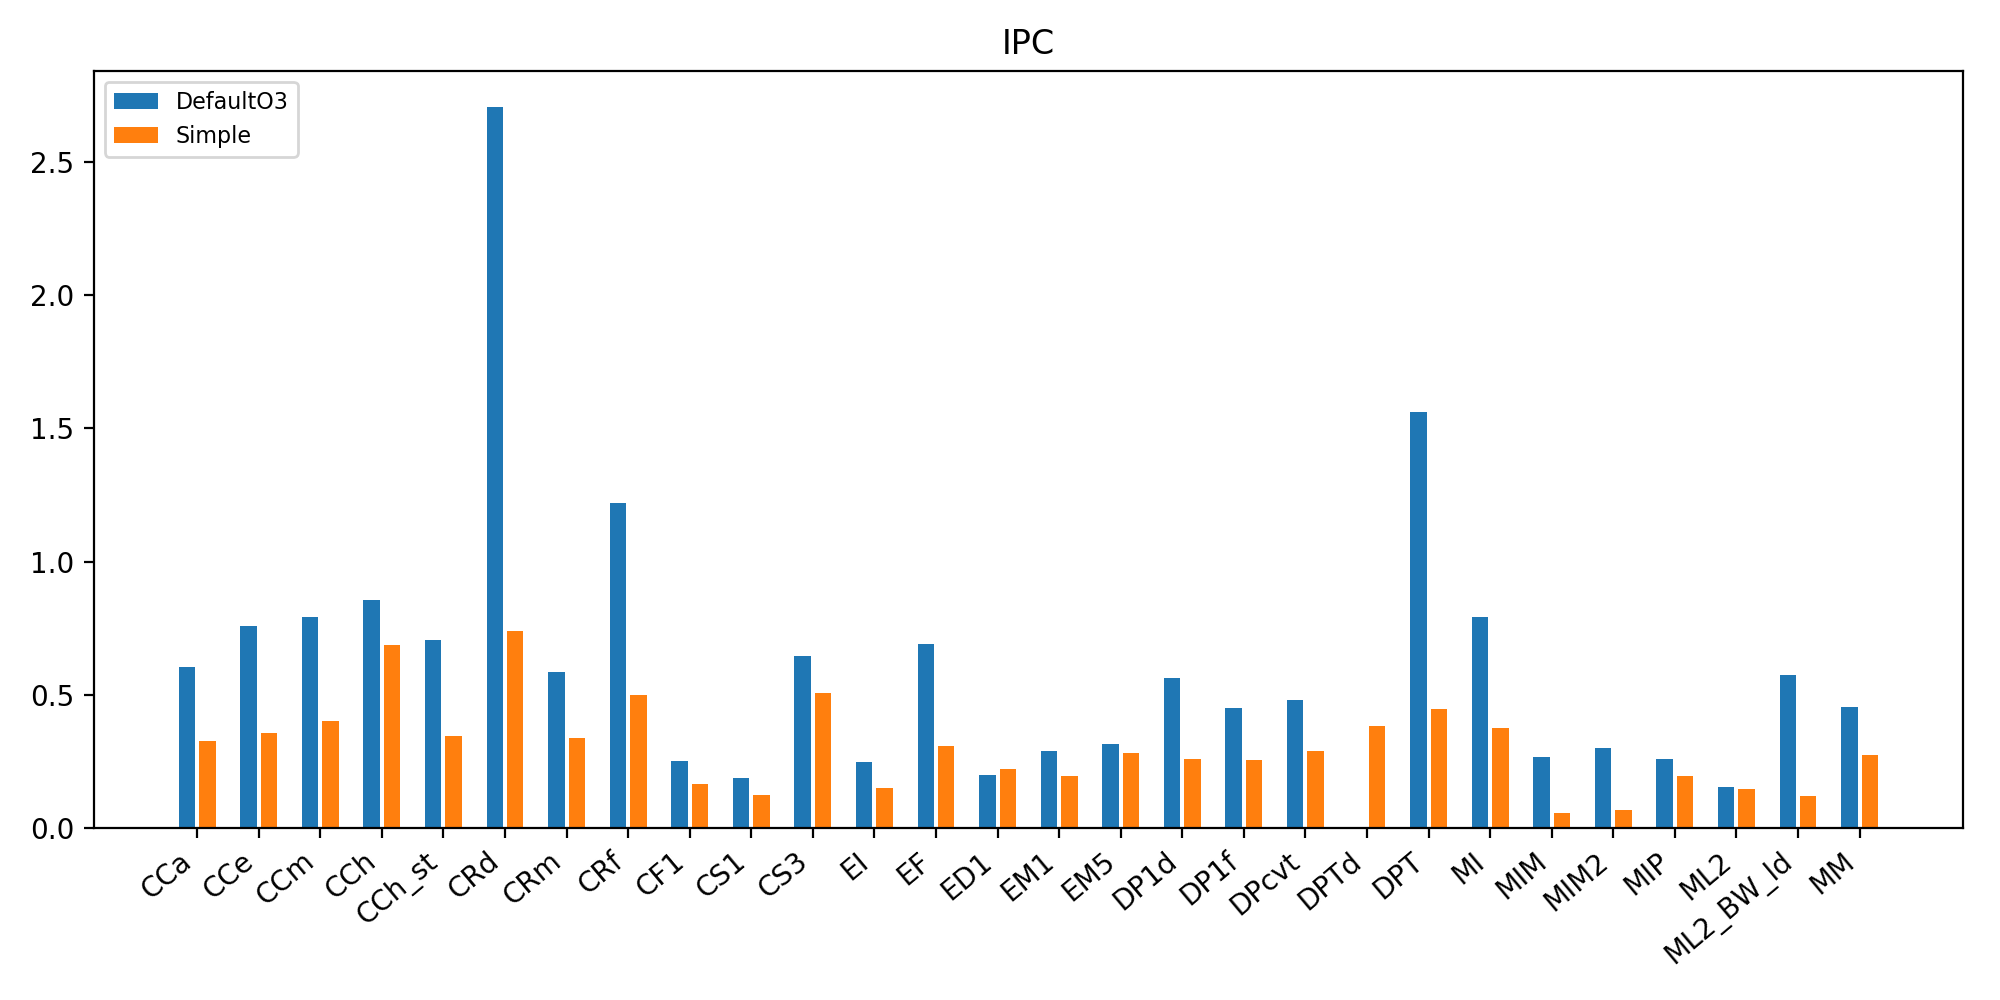

In [18]:
#plotting IPC
benchmarks = all_benchmarks
benchmark_names =  all_benchmarks_names
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'ipc',norm=False)
plt.ylabel('')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC')
plt.tight_layout()
plt.savefig('IPC_allbenchmarks.png', format='png', dpi=600)